
# **Problem Statement 1**

A retail store chain with multiple outlets across the country is facing challenges in effectively managing its inventory. The primary issue is matching the supply with fluctuating customer demand across different locations. To help address this, weekly sales data for various outlets has been provided for analysis.

---

# **Dataset Information**

The dataset **walmart.csv** contains **6,435 rows** and **8 columns**.

| Feature Name     | Description                                   |
| ---------------- | --------------------------------------------- |
| **Store**        | Store number                                  |
| **Date**         | Week of sales                                 |
| **Weekly_Sales** | Sales for the given store in that week        |
| **Holiday_Flag** | Indicates whether the week includes a holiday |
| **Temperature**  | Temperature on the day of sale                |
| **Fuel_Price**   | Cost of fuel in the region                    |
| **CPI**          | Consumer Price Index                          |
| **Unemployment** | Unemployment rate                             |

---

# **Task 1: Exploratory & Statistical Analysis**

Using statistical analysis, EDA, outlier analysis, and data preprocessing (including handling missing values), derive insights to help the retailer understand:

* a. Whether weekly sales are affected by the unemployment rate, and which stores are impacted the most.
* b. Whether weekly sales exhibit any seasonal trends, and possible reasons behind them.
* c. Whether temperature influences weekly sales.
* d. How the Consumer Price Index (CPI) affects weekly sales across stores.
* e. Identification of top-performing stores based on historical data.
* f. Identification of the worst-performing store, and the significance of the difference between the highest and lowest performing stores.

---

# **Task 2: Predictive Modeling**

Build predictive models to **forecast the weekly sales for each store for the next 12 weeks**, using suitable machine learning or time-series forecasting techniques.

---

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Walmart DataSet.csv")
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# * a. Whether weekly sales are affected by the unemployment rate, and which stores are impacted the most.


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

def relation(df):
    result = {}
    
    for store in df['Store'].unique():
        df1 = df[df['Store'] == store]
        # Scale the entire df1
        scaler = StandardScaler()
        df1_scaled = pd.DataFrame(
            scaler.fit_transform(df1[['Weekly_Sales','Unemployment']]),
            columns=['Weekly_Sales','Unemployment']
        )
        
        # After scaling select X, y
        X = df1_scaled[['Weekly_Sales']]
        y = df1_scaled[['Unemployment']]
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Prediction
        y_pred = model.predict(X_test)
        
        # R² Score
        r2 = r2_score(y_test, y_pred)
        
        result[store] = r2
    
    return result


In [6]:
re = relation(df)
print(re)
df_corr = (
    pd.DataFrame.from_dict(re, orient='index', columns=['R2_Score'])
      .reset_index()
      .rename(columns={'index': 'Store'})
)
df_corr

{np.int64(1): -0.001071758444220361, np.int64(2): -0.029889633541204885, np.int64(3): -0.0038720335079640567, np.int64(4): 0.19991877075406883, np.int64(5): 0.028658054499365426, np.int64(6): -0.018457452311876787, np.int64(7): 0.07020573700034805, np.int64(8): -0.013689711748305688, np.int64(9): 0.013920363098211985, np.int64(10): -0.03295288318295242, np.int64(11): -0.01713893764858443, np.int64(12): -0.012481378657273723, np.int64(13): 0.05298110071164386, np.int64(14): 0.05230814312331966, np.int64(15): -0.0327623927525833, np.int64(16): 0.017684349185875803, np.int64(17): -0.018791831984151353, np.int64(18): -0.03480398872539747, np.int64(19): -0.0138874702010785, np.int64(20): 0.020756768681308047, np.int64(21): -0.02115486943556677, np.int64(22): -0.03184285450023672, np.int64(23): 0.013196856524647638, np.int64(24): -0.009620014417066614, np.int64(25): -0.008284303941490379, np.int64(26): -0.000418858098483188, np.int64(27): -0.00693443521773518, np.int64(28): 0.006987985718591

,Store,R2_Score
0,1,-0.001072
1,2,-0.029890
2,3,-0.003872
3,4,0.199919
4,5,0.028658
5,6,-0.018457
6,7,0.070206
7,8,-0.013690
8,9,0.013920
9,10,-0.032953


# **Insight on Unemployment and Weekly Sales**

* Store 36 shows a noticeable relationship between unemployment and its weekly sales.

* Store 44 shows an even stronger relationship between unemployment and its weekly sales compared to Store 36.

# **c. Whether temperature influences weekly sales.**

In [7]:
df2 = df[df['Store'] == 1]
df_new1 = df2[['Weekly_Sales','Temperature']]

In [8]:
df_new1

,Weekly_Sales,Temperature
0,1643690.90,42.31
1,1641957.44,38.51
2,1611968.17,39.93
3,1409727.59,46.63
4,1554806.68,46.50
...,...,...
138,1437059.26,76.08
139,1670785.97,68.55
140,1573072.81,62.99
141,1508068.77,67.97


In [9]:
df_new1.corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.222701
Temperature,-0.222701,1.000000


In [10]:
df_new1['Weekly_Sales'].corr(df_new1['Temperature'])

np.float64(-0.22270055855381082)

In [11]:
def relation_corr_Tem(df):
    result = {}
    for store in df['Store'].unique():
        df2 = df[df['Store'] == store]
        corr_relation = df2['Weekly_Sales'].corr(df2['Temperature'])
        result[store] = corr_relation
    return result


In [12]:
re2 = relation_corr_Tem(df)

In [13]:
df_corr = pd.DataFrame.from_dict(re2, orient='index', columns=['Correlation'])
df_corr

,Correlation
1,-0.222701
2,-0.297673
3,-0.377524
4,-0.225583
5,-0.175517
6,-0.084863
7,0.015077
8,-0.312324
9,-0.208343
10,-0.432569


# **Insight**

* There is no significant relationship between weekly sales and temperature.

# **d. How the Consumer Price Index (CPI) affects weekly sales across stores.**

In [14]:
def relation_corr_CPI(df):
    result = {}
    for store in df['Store'].unique():
        df2 = df[df['Store'] == store]
        corr_relation = df2['Weekly_Sales'].corr(df2['CPI'])
        result[store] = corr_relation
    return result


In [15]:
re1 = relation_corr_CPI(df)

In [16]:
df_corr = pd.DataFrame.from_dict(re1, orient='index', columns=['Correlation'])
df_corr

,Correlation
1,0.225408
2,-0.062431
3,0.317250
4,0.351157
5,0.308261
6,-0.011357
7,0.289044
8,0.120255
9,0.294805
10,-0.115374


# **Insight: Relationship Between CPI Index and Weekly Sales.**

* Store 36 shows the strongest negative relationship between the CPI index and weekly sales.

   In simple terms: when the CPI increases, the weekly sales decrease, and vice versa.

* Stores 38 and 44 show a strong positive relationship between the CPI index and weekly sales.

   This means: when the CPI increases, the weekly sales also increase, and when the CPI decreases, the weekly sales also decrease.

# **Identification of top-performing stores based on historical data.**

In [17]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales',ascending = False)
top_stores

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


# **Insight: Which Stores Are the Top-Performing Stores?**

* Stores 20, 14, 13, and 2 have the highest total sales among all 45 stores.

#  **Identification of the worst-performing store, and the significance of the difference between the highest and lowest performing stores.**

# **Insight: Difference Between the Top-Performing and Lowest-Performing Stores.**

* The difference between the highest-performing and lowest-performing stores is as follows:

    Highest total sales (Store 20) = 30,13,97,800

    Lowest total sales (Store 33) = 3,71,60,220

    Difference = 26,42,37,580

2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

In [20]:
df_weekly_Sales = df[['Date','Weekly_Sales']]

In [22]:
df_weekly_Sales = df_weekly_Sales.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [23]:
df_weekly_Sales

,Date,Weekly_Sales
0,01-04-2011,43458991.19
1,01-06-2012,48281649.72
2,01-07-2011,47578519.50
3,01-10-2010,42239875.87
4,02-03-2012,46861034.97
...,...,...
138,30-07-2010,44630363.42
139,30-09-2011,42195830.81
140,30-12-2011,46042461.04
141,31-08-2012,47159639.43


In [24]:
df_weekly_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   Weekly_Sales  143 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [36]:
df_weekly_Sales['Date'] = pd.to_datetime(df_weekly_Sales['Date'], format='%d-%m-%Y')

In [37]:
df_weekly_Sales.sort_values('Date',ascending = True, inplace = True)

In [38]:
df_weekly_Sales

,Date,Weekly_Sales
19,2010-02-05,49750740.50
52,2010-02-12,48336677.63
85,2010-02-19,48276993.78
118,2010-02-26,43968571.13
20,2010-03-05,46871470.30
...,...,...
130,2012-09-28,43734899.40
22,2012-10-05,47566639.31
55,2012-10-12,46128514.25
88,2012-10-19,45122410.57


# **b. Whether weekly sales exhibit any seasonal trends, and possible reasons behind them.**


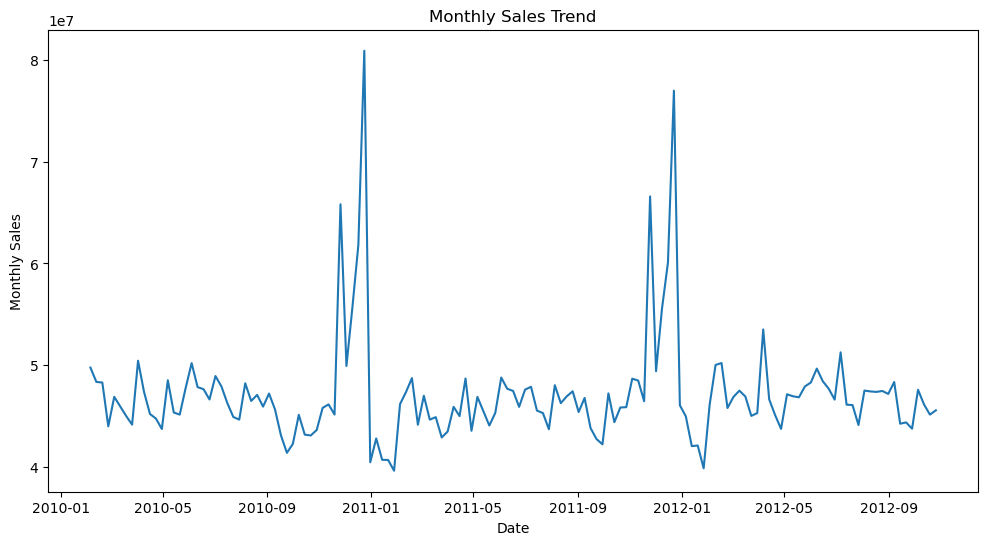

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df_weekly_Sales['Date'], df_weekly_Sales['Weekly_Sales'])
plt.xlabel("Date")
plt.ylabel("Monthly Sales")
plt.title("Monthly Sales Trend")
plt.show()   # <-- add this


# **Insight About the Seasonal Trend of Walmart’s Weekly Sales**

* The seasonal trend typically appears toward the end of each year and continues into the first month of the new year.

* This pattern is most visible from October to January.

* A possible reason for this increase is the festive and holiday season, during which customer demand rises sharply.

* As a result, the sales of various items become higher, leading to a consistent spike in weekly sales during these months.

# **Build predictive models to **forecast the weekly sales for each store for the next 12 weeks**, using suitable machine learning or time-series forecasting techniques.**

In [40]:
rolling_mean = df_weekly_Sales['Weekly_Sales'].rolling(window = 52).mean()
rolling_std = df_weekly_Sales['Weekly_Sales'].rolling(window = 52).std()

In [46]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_weekly_Sales['Weekly_Sales'])
result[1]

np.float64(2.675979158986027e-07)

In [47]:
if result[1] < 0.05:
  print('This data is stationary')
else:
  print('This data is not stationary because the value is greater then 0.05')

This data is stationary


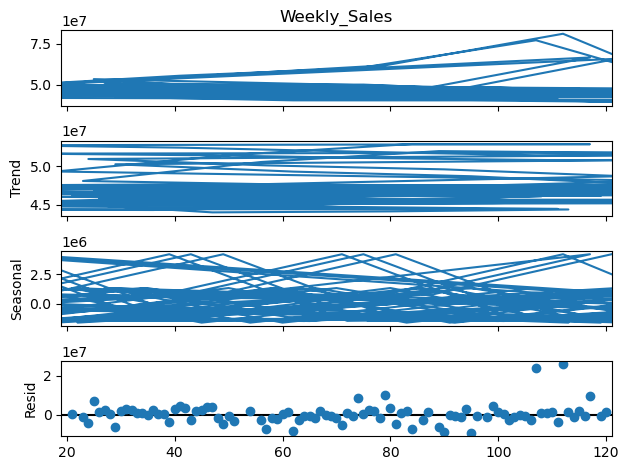

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal = seasonal_decompose(df_weekly_Sales['Weekly_Sales'],model = 'additive',period = 12)
seasonal.plot()
plt.show()

In [49]:
train = df_weekly_Sales['Weekly_Sales'].iloc[:115]
test = df_weekly_Sales['Weekly_Sales'].iloc[115:]

In [50]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import *
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [53]:
p = range(0,6)
d = range(0,1)
q = range(0,7)
# s = range(12,13) for sarimax

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5, 0, 3),
 (5, 0, 4),
 (5, 0, 5),
 (5, 0, 6)]

In [55]:
rmse = []
order_pdq = []
for x in pdq:
    model = ARIMA(train,order=x)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train), end= len(train)+len(test)-1)
    rmseerror = np.sqrt(mean_squared_error(test,pred))
    order_pdq.append(x)
    rmse.append(rmseerror)

df_pdq = pd.DataFrame(index=order_pdq,data=rmse,columns=['RMSE'])
df_pdq

C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Pyth

,RMSE
"(0, 0, 0)",1.835665e+06
"(0, 0, 1)",1.815604e+06
"(0, 0, 2)",1.820026e+06
"(0, 0, 3)",1.713579e+06
"(0, 0, 4)",1.929959e+06
"(0, 0, 5)",1.972934e+06
"(0, 0, 6)",1.938108e+06
"(1, 0, 0)",1.823310e+06
"(1, 0, 1)",1.859750e+06
"(1, 0, 2)",1.819646e+06


In [58]:
df_pdq.sort_values('RMSE',ascending = True)

,RMSE
"(0, 0, 3)",1.713579e+06
"(0, 0, 1)",1.815604e+06
"(4, 0, 0)",1.816389e+06
"(1, 0, 3)",1.819330e+06
"(1, 0, 2)",1.819646e+06
"(0, 0, 2)",1.820026e+06
"(1, 0, 0)",1.823310e+06
"(2, 0, 3)",1.829359e+06
"(3, 0, 3)",1.831630e+06
"(2, 0, 2)",1.834074e+06


In [69]:
final_arima_model = ARIMA(train,order=(0,0,3))
final_arima_model = final_arima_model.fit()

C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [70]:
df_weekly_Sales['FinalArimaPrediction'] = final_arima_model.predict(start=len(train), end=len(train)+len(test)-1)

C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

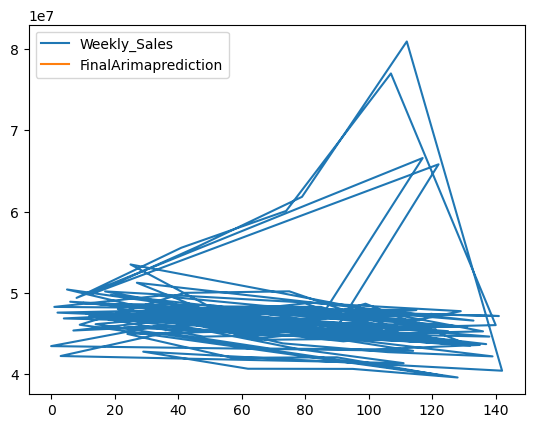

In [71]:
df_weekly_Sales[['Weekly_Sales','FinalArimaprediction']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [73]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = auto_arima(
    train,
    start_p=0, max_p=5,       # p range
    start_q=0, max_q=5,       # q range
    d=None,                   # let auto-arima decide d
    start_P=0, max_P=3,       # P range
    start_Q=0, max_Q=3,       # Q range
    D=None,                   # let auto-arima decide D
    seasonal=True,
    m=52,                     # 52 for weekly (use 12 for monthly)
    trace=True,               # show model search
    error_action='ignore',
    suppress_warnings=True,
    stepwise=False            # full search (more accurate)
)

print(model.summary())

 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3919.357, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=3888.955, Time=1.93 sec
 ARIMA(0,0,0)(0,0,2)[52] intercept   : AIC=3884.880, Time=7.99 sec
 ARIMA(0,0,0)(0,0,3)[52] intercept   : AIC=3885.029, Time=46.84 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=3920.948, Time=1.87 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=3890.851, Time=5.33 sec
 ARIMA(0,0,0)(1,0,2)[52] intercept   : AIC=3886.839, Time=18.74 sec
 ARIMA(0,0,0)(1,0,3)[52] intercept   : AIC=3887.005, Time=51.38 sec
 ARIMA(0,0,0)(2,0,0)[52] intercept   : AIC=inf, Time=21.19 sec
 ARIMA(0,0,0)(2,0,1)[52] intercept   : AIC=inf, Time=85.01 sec
 ARIMA(0,0,0)(2,0,2)[52] intercept   : AIC=inf, Time=104.81 sec
 ARIMA(0,0,0)(2,0,3)[52] intercept   : AIC=inf, Time=173.64 sec
 ARIMA(0,0,0)(3,0,0)[52] intercept   : AIC=inf, Time=15.59 sec
 ARIMA(0,0,0)(3,0,1)[52] intercept   : AIC=inf, Time=51.20 sec
 ARIMA(0,0,0)(3,0,2)[52] intercept   : AIC=inf, Time=36.12 sec
 ARIMA(0,0,1)(0,0,

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(2,0,2), seasonal_order=(1,0,0,12))
model = model.fit()

C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsm

C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SANDEEP KUMAR VERMA\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

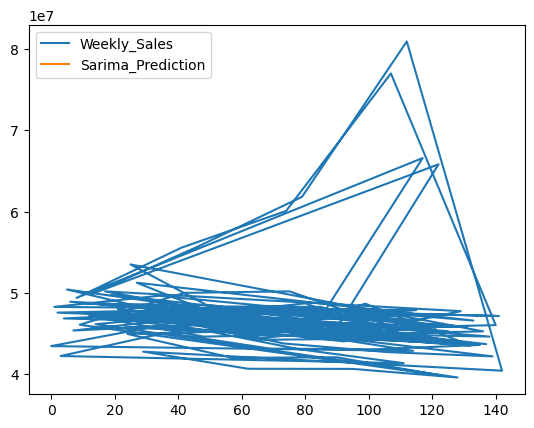

In [78]:
df_weekly_Sales['Sarima_Prediction'] = model.predict(start=len(train), end=len(train)+len(test)-1)
df_weekly_Sales[['Weekly_Sales','Sarima_Prediction']].plot()